<a href="https://colab.research.google.com/github/Graylab/DL4Proteins-notebooks/blob/main/notebooks/WS02_NeuralNetworksWithPyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<font color='#569098' size=20>PyTorch를 활용한 신경망</font>**

##[홈페이지로 돌아가기](https://github.com/Graylab/DL4Proteins-notebooks)

이 튜토리얼은 [sentdex](https://www.youtube.com/@sentdex)의 Harrison Kinsley의 자료를 각색하고 이미지를 차용했습니다.

**목표: 이 워크숍을 마치면 다음을 수행할 수 있습니다:**

* <font color='#e59454'>PyTorch로 신경망 모델 정의 및 인스턴스화</font>
* <font color='#e59454'>다중 클래스 분류 작업을 위한 학습 루프 정의 및 실행</font>
* <font color='#e59454'>신경망의 학습된 분류 환경 시각화</font>

**_작업 내용을 저장하려면 이 노트북의 사본을 개인 Google 드라이브에 저장하세요._**


**<font color='#569098' size = 5> 목차 </font>**

**[섹션 1: 모델 정의](https://colab.research.google.com/drive/1Ic0lWZqSR4BhwuVNXUyFr92hOShh01z6#scrollTo=sXC95X1SznTH)**

* 신경망 클래스 정의
* 나선형 다중 클래스 분류 데이터셋 생성
* 모델, 손실 함수, 옵티마이저 인스턴스화

**[섹션 2: 학습](https://colab.research.google.com/drive/1Ic0lWZqSR4BhwuVNXUyFr92hOShh01z6#scrollTo=-e2rJZKOH0Yd)**

* 손실, 옵티마이저, 정확도 계산을 포함한 학습 루프를 올바르게 배치

**[섹션 3: 성능](https://colab.research.google.com/drive/1Ic0lWZqSR4BhwuVNXUyFr92hOShh01z6#scrollTo=85as_3Fl5JIQ)**

* 학습된 분류 영역을 메쉬 표현으로 시각화

### <b> <font color='#569098'> 라이브러리 임포트

In [ ]:
!pip install nnfs

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import nnfs
from nnfs.datasets import spiral_data

nnfs.init()

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# <b> <font color='#569098'> 섹션 1: 모델 정의

이전 노트북에서는 모델의 구성 요소를 정의하기 위해 7개의 클래스가 필요했지만, 아래는 PyTorch를 사용할 때 필요한 전부입니다!

In [ ]:
# custom NN inheriting from nn.Module
class MyModel(nn.Module):
  def __init__(self):
    super(MyModel, self).__init__()
    # first dense (fully connected) layer with 2 input features, 64 output neurons
    self.dense1 = nn.Linear(2, 64)
    # define activation function (ReLU) for first hidden layer
    self.relu1 = nn.ReLU()
    # # second desne layer with 64 input neurons, 3 output neurons
    self.dense2 = nn.Linear(64, 3)

  # forward pass
  # computes output of model given input data x
  def forward(self, x):
    # pass input x through first dense layer
    x = self.dense1(x)
    # apply ReLU activation function to output of first dense layer
    x = self.relu1(x)
    # pass output of ReLU activation function through second dense layer
    x = self.dense2(x)
    # return output of second dense layer
    return x


## **<font color='#569098'>데이터셋 생성**
우리는 입력 $X$(이전 워크숍과 같은 두 개의 설명적 특성인 x와 y 좌표)가 주어졌을 때 점의 색상(y $ϵ$ $\{$초록, 빨강, 또는 파랑$\}$ )을 예측하도록 신경망을 학습시킬 것입니다.

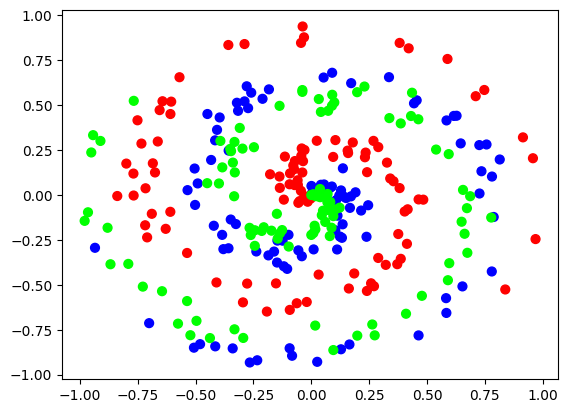

In [ ]:
# generate data for a classification task
X, y = spiral_data(samples=100, classes=3)

# convert dataset to pytorch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.long)

# visualize dataset
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='brg')


## **<font color='#569098'>모델 인스턴스화**

ReLU 활성화 함수를 가진 두 개의 Dense(완전 연결) 레이어로 구성된 피드포워드 신경망을 사용할 것입니다. 첫 번째 레이어는 200개의 입력 특성을 받아 64개의 뉴런을 출력하고, 두 번째 레이어는 64개의 뉴런을 받아 3개의 뉴런을 출력합니다.

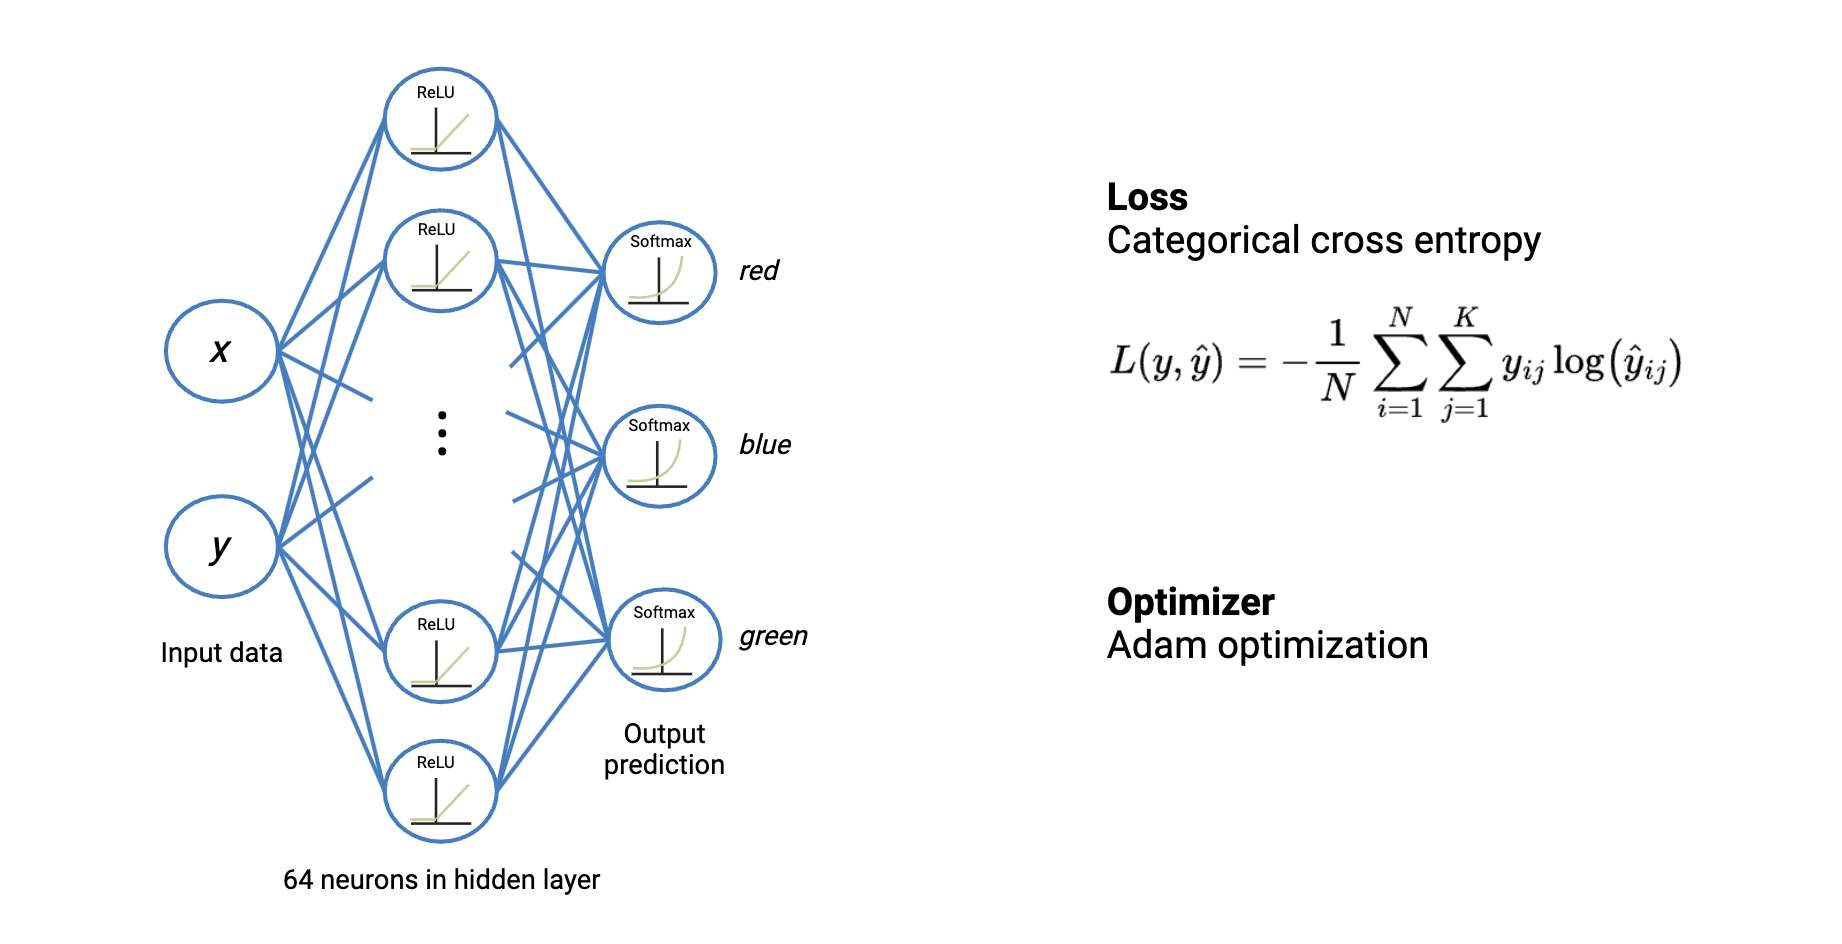

In [ ]:
# Define the model
model = MyModel()

# Loss and optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.05, weight_decay=5e-7)

# <b> <font color='#569098'> 섹션 2: 학습

In [ ]:
# Train in loop
for epoch in range(10001):
    # Forward pass
    outputs = model(X)

    # Calculate the loss
    loss = loss_function(outputs, y)

    # Zero gradients, backward pass, and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Calculate accuracy
    _, predicted = torch.max(outputs, 1)
    accuracy = (predicted == y).float().mean()

    # Print epoch, accuracy, loss, learning rate every 100 epochs
    if epoch % 100 == 0:
        print(f'Epoch: {epoch}, Accuracy: {accuracy.item():.3f}, Loss: {loss.item():.3f}, Learning Rate: {optimizer.param_groups[0]["lr"]}')


Epoch: 0, Accuracy: 0.347, Loss: 1.095, Learning Rate: 0.05
Epoch: 100, Accuracy: 0.787, Loss: 0.525, Learning Rate: 0.05
Epoch: 200, Accuracy: 0.857, Loss: 0.360, Learning Rate: 0.05
Epoch: 300, Accuracy: 0.887, Loss: 0.280, Learning Rate: 0.05
Epoch: 400, Accuracy: 0.900, Loss: 0.238, Learning Rate: 0.05
Epoch: 500, Accuracy: 0.917, Loss: 0.212, Learning Rate: 0.05
Epoch: 600, Accuracy: 0.917, Loss: 0.198, Learning Rate: 0.05
Epoch: 700, Accuracy: 0.927, Loss: 0.188, Learning Rate: 0.05
Epoch: 800, Accuracy: 0.927, Loss: 0.182, Learning Rate: 0.05
Epoch: 900, Accuracy: 0.923, Loss: 0.174, Learning Rate: 0.05
Epoch: 1000, Accuracy: 0.890, Loss: 0.257, Learning Rate: 0.05
Epoch: 1100, Accuracy: 0.930, Loss: 0.166, Learning Rate: 0.05
Epoch: 1200, Accuracy: 0.930, Loss: 0.155, Learning Rate: 0.05
Epoch: 1300, Accuracy: 0.933, Loss: 0.147, Learning Rate: 0.05
Epoch: 1400, Accuracy: 0.937, Loss: 0.141, Learning Rate: 0.05
Epoch: 1500, Accuracy: 0.940, Loss: 0.137, Learning Rate: 0.05
Epoc

# <b> <font color='#569098'> 섹션 3: 성능

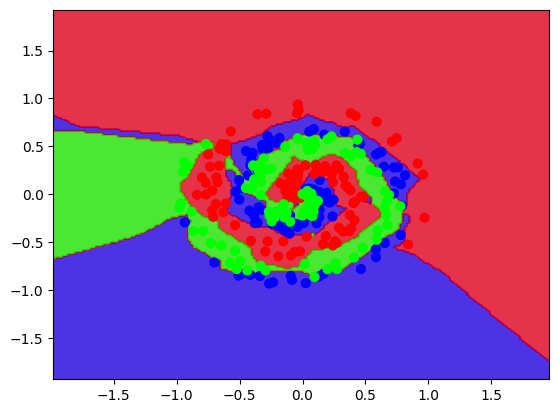

In [ ]:
# create meshgrid of points covering the feature space
h = 0.02
# determine min and max values for x,y axes
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# create meshgrid of points with spacing h
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# convert meshgrid to torch tensor
meshgrid_points = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)

# pass meshgrid points through model
with torch.no_grad():
  # forward pass through first dense
  z1 = model.dense1(meshgrid_points)
  # apply relu activation
  a1 = torch.relu(z1)
  # forward pass through second dense
  z2 = model.dense2(a1)
  # compute softmax probabilities for each class
  exp_scores = torch.exp(z2 - torch.max(z2, axis=1, keepdim=True).values)
  probs = exp_scores / torch.sum(exp_scores, axis=1, keepdim=True)

# predictions
# determine predicted class for each point in meshgrid
_, predictions = torch.max(probs, axis=1)
# reshape predictions to match shape of meshgrid
Z = predictions.numpy().reshape(xx.shape)

# plot decision boundary based on predictions
plt.contourf(xx, yy, Z, cmap='brg', alpha=0.8)

# plot original data on top of decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='brg')
# plot limits set to match extent of meshgrid
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()


## **<font color='#569098'>1) 질문**

**질문**: 신경망의 은닉층 활성화 함수를 ReLU에서 sigmoid로 변경하면 어떻게 되나요? 이 변경 사항을 시도해보고 성능 변화에 대해 언급해 보세요.

In [ ]:
#@markdown <font color='#e59454'>Run to See Answer!</font>

print('\n ReLU outperforms sigmoid. \n ReLU mitigates the vanishing gradient problem by allowing gradients to flow for positive inputs. \n Sigmoid will lead to poorer convergence due to the smaller effective gradient.')


**질문**: 손실 함수를 `CrossEntropyLoss`에서 `MeanSquaredError`로 변경하면 분류 모델의 학습에 어떤 영향을 미치나요? 이것을 시도해보고 무슨 일이 일어나는지 설명해 보세요.

In [ ]:
#@markdown <font color='#e59454'>Run to See Answer!</font>

print("\n Using MSE for classification results in worse performance. \n This is because MSE doesn't explicitly encourage the model to push the probability of the correct class to 1 while minimizing the others.")


**질문**: 학습률 0.01의 SGD 옵티마이저를 사용하는 것과 학습률 0.001의 Adam 옵티마이저를 사용하는 것은 어떻게 다른가요?

In [ ]:
#@markdown <font color='#e59454'>Run to See Answer!</font>

print("\n Both optimizers perform similarly, but Adam with a learning rate of 0.001 will convergence faster.")


**질문**: 신경망 모델에 128개의 뉴런을 가진 은닉층을 하나 더 추가하면 어떻게 되나요?

In [ ]:
#@markdown <font color='#e59454'>Run to See Answer!</font>

print("\n Adding another hidden layer with 128 neurons to the neural network will increase the model's capacity to learn more complex patterns in the data. \n Adding the extra layer will improve the performance slightly, but the original model already achieves high accuracy (~0.970).")


**질문**: 0.001의 가중치 감쇠(weight decay)를 사용하면 신경망 모델의 학습에 어떤 영향을 미치나요?

In [ ]:
#@markdown <font color='#e59454'>Run to See Answer!</font>

print("\n Using a weight decay of 0.001 (up from the original 5e-7) will increase regularization, penalizing large weights more heavily. \n Training accuracy may decrease slightly, but will improve generalization.")
